In [ ]:
import torch
import torch.optim as optim
import numpy as np

torch.manual_seed(42)

dim_hidden = 6
dim_input = 1
dim_output = 1

Wrec = torch.randn(dim_hidden, dim_hidden, requires_grad=True)
Win = torch.randn(dim_hidden, dim_input, requires_grad=True)
Wout = torch.randn(dim_hidden,dim_output, requires_grad=True)

def recurrent_unit(x, h_prev, Wrec, Win):
    """
    INPUT
    x - a singleton tensor
    h_prev - a tensor of shape (dim_hidden, 1)

    RETURN
    h_next - a tensor of shape (dim_hidden, 1)
    """
    h_next = torch.relu(torch.matmul(Wrec, h_prev) + Win * x)
    return h_next
    # YOUR CODE HERE
    raise NotImplementedError

learning_rate = 0.01
num_epochs = 1000


optimizer = optim.SGD([Wrec, Win, Wout], lr=learning_rate)

# keep track of the losses
loss_history = []

def forward(seq, Wrec, Win, Wout):
    """
    INPUT
    seq - a tensor of shape (seq_length, 1)
    Wrec - as above
    Win - ditto
    Wout - ditto

    RETURN
    yhat - a singleton tensor
    """
    h = torch.zeros(dim_hidden,1)
    for x in seq:
        h = recurrent_unit(x, h, Wrec, Win)
    return torch.sum(Wout*h)
    # YOUR CODE HERE
    # hint:  use the `for x in seq: ...`
    raise NotImplementedError

minibatch_size = 2**8
seq_length = 5
for epoch in range(num_epochs):
    loss = 0
    for _ in range(minibatch_size):
        xs = torch.tensor(np.random.randn(seq_length, dim_input), dtype=torch.float32)
        max_xs = torch.max(xs).item()
        yhat = forward(xs, Wrec, Win, Wout)
        loss += torch.abs(yhat - max_xs)
    loss = loss / minibatch_size

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss for monitoring
    loss_history.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# expected output (not exact)
#
# Epoch 0, Loss: 6.725135326385498
# Epoch 100, Loss: 0.486219197511673
# Epoch 200, Loss: 0.4179069399833679
# ...


Epoch 0, Loss: 6.317586898803711
Epoch 100, Loss: 0.4774465560913086
Epoch 200, Loss: 0.4159591794013977
Epoch 300, Loss: 0.4364781975746155
Epoch 400, Loss: 0.3978283405303955
Epoch 500, Loss: 0.39555540680885315
Epoch 600, Loss: 0.39520779252052307
Epoch 700, Loss: 0.4094882607460022
Epoch 800, Loss: 0.371322900056839
Epoch 900, Loss: 0.3647429347038269


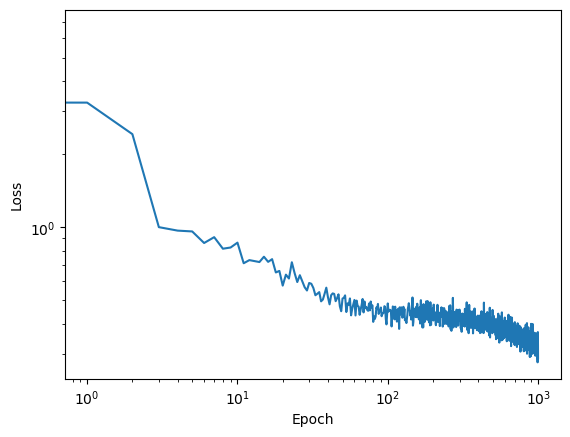

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
for _ in range(10):
    xs = torch.tensor(np.random.randn(seq_length, 1), dtype=torch.float32)
    max_xs = torch.max(xs).item()

    yhat = forward(xs, Wrec, Win, Wout)
    print(f"actual max: {max_xs}, predicted max: {yhat}")

actual max: 0.1843394637107849, predicted max: 0.25789064168930054
actual max: 1.1652047634124756, predicted max: 1.4466029405593872
actual max: 0.883126974105835, predicted max: 0.9369467496871948
actual max: 1.5089008808135986, predicted max: 1.4639673233032227
actual max: 1.2334516048431396, predicted max: 1.2077350616455078
actual max: 1.5857791900634766, predicted max: 2.2057485580444336
actual max: 0.4830968677997589, predicted max: -0.37489840388298035
actual max: 0.7375144362449646, predicted max: 0.7070600986480713
actual max: 2.1257176399230957, predicted max: 2.020230770111084
actual max: 2.1557650566101074, predicted max: 2.1876156330108643
